#  Homework 2

Deadline: October 14th Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 

Exploratory data analysis (EDA) plays a very important role in data science projects. It helps us understand the data and explore the hidden relations. Moreover, it helps us in the selection of the appropriate statistical and machine learning tools and techniques. In this problem we are going to perform an exploratory data analysis on 120 years of Olympics data. (65%)

**a)** Download the data from [this Kaggle data repository](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) and load the athlete_event.csv file into a pandas DataFrame called olympics120. Filter the DataFrame so that it only contains data about the Summer season. **Hint:** one way to do this is with pandas query() function.

In [45]:
import pandas as pd
olympics120 = pd.read_csv(r'./Data/athlete_events.csv')

#df with season only summer
olympics120summer = olympics120[olympics120["Season"] == "Summer"]

**b)** Retrieve some basic descriptive statistics about the dataset using the .describe() method of pandas DataFrames. Now, try to guess which sports have the shortest, tallest (height column), heaviest, lightest (weight column), youngest and oldest (age column) athletes in the Olympics. Then, check your guess based on the data! Print out which sport has the tallest, shortest, heaviest, lightest, youngest and oldest athletes.

In [46]:
olympics120summer.describe()
#finding rows that has the max/min value for the relevant column and then concatenating the value of the sport column as a string
#is there a more efficient way of doing this considering we want all sports where it is max/min. eg. there are 2 sports for shortest??
print("Sport with the tallest athelete: " + olympics120summer[olympics120summer.Height == olympics120summer.Height.max()][["Sport"]].astype(str))
print("Sport with the shortest athelete: " + olympics120summer[olympics120summer.Height == olympics120summer.Height.min()][["Sport"]].astype(str))
print("Sport with the heaviest athelete: " + olympics120summer[olympics120summer.Weight == olympics120summer.Weight.max()][["Sport"]].astype(str))
print("Sport with the lightest athelete: " + olympics120summer[olympics120summer.Weight == olympics120summer.Weight.min()][["Sport"]].astype(str))
print("Sport with the oldest athelete: " + olympics120summer[olympics120summer.Age == olympics120summer.Age.max()][["Sport"]].astype(str))
print("Sport with the youngest athelete: " + olympics120summer[olympics120summer.Age == olympics120summer.Age.min()][["Sport"]].astype(str))


                                              Sport
265040  Sport with the tallest athelete: Basketball
265041  Sport with the tallest athelete: Basketball
265042  Sport with the tallest athelete: Basketball
                                               Sport
29333   Sport with the shortest athelete: Gymnastics
29334   Sport with the shortest athelete: Gymnastics
29335   Sport with the shortest athelete: Gymnastics
29336   Sport with the shortest athelete: Gymnastics
29337   Sport with the shortest athelete: Gymnastics
29338   Sport with the shortest athelete: Gymnastics
164821      Sport with the shortest athelete: Boxing
                                        Sport
23155  Sport with the heaviest athelete: Judo
23156  Sport with the heaviest athelete: Judo
                                              Sport
40849  Sport with the lightest athelete: Gymnastics
40850  Sport with the lightest athelete: Gymnastics
40851  Sport with the lightest athelete: Gymnastics
40852  Sport with the 

**c)** Consider only the male athletes of the following sports: Basketball, Gymnastics, Wrestling. Make a scatter plot in which the x axis shows the athletes' weights and the y axis shows the athletes' heights. Each sport should be represented by a different color point on the plot. Make one scatter plot like this for the 2012 London Olympics, and another for the 1960 Rome Olympics. **Hints:** You can create the scatterplots with the .scatterplot() function of the seaborn package. You can place the scatterplots next to each other with the help of the .subplot() function of the matplotlib.pyplot package. You can fix the scales of the axes with the matplotlib.pyplot.xlim([lower, upper]) function. It is not required to use these hints, but seaborn and matplotlib are good libraries to explore for plotting:) <br> <br> What is the relationship between the heights and weights of athletes in these sports? How do these data differ for the 1960 and 2012 Olympics? <span style="color:red">Summarize your thoughts in a few sentences!</span>

In [73]:
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

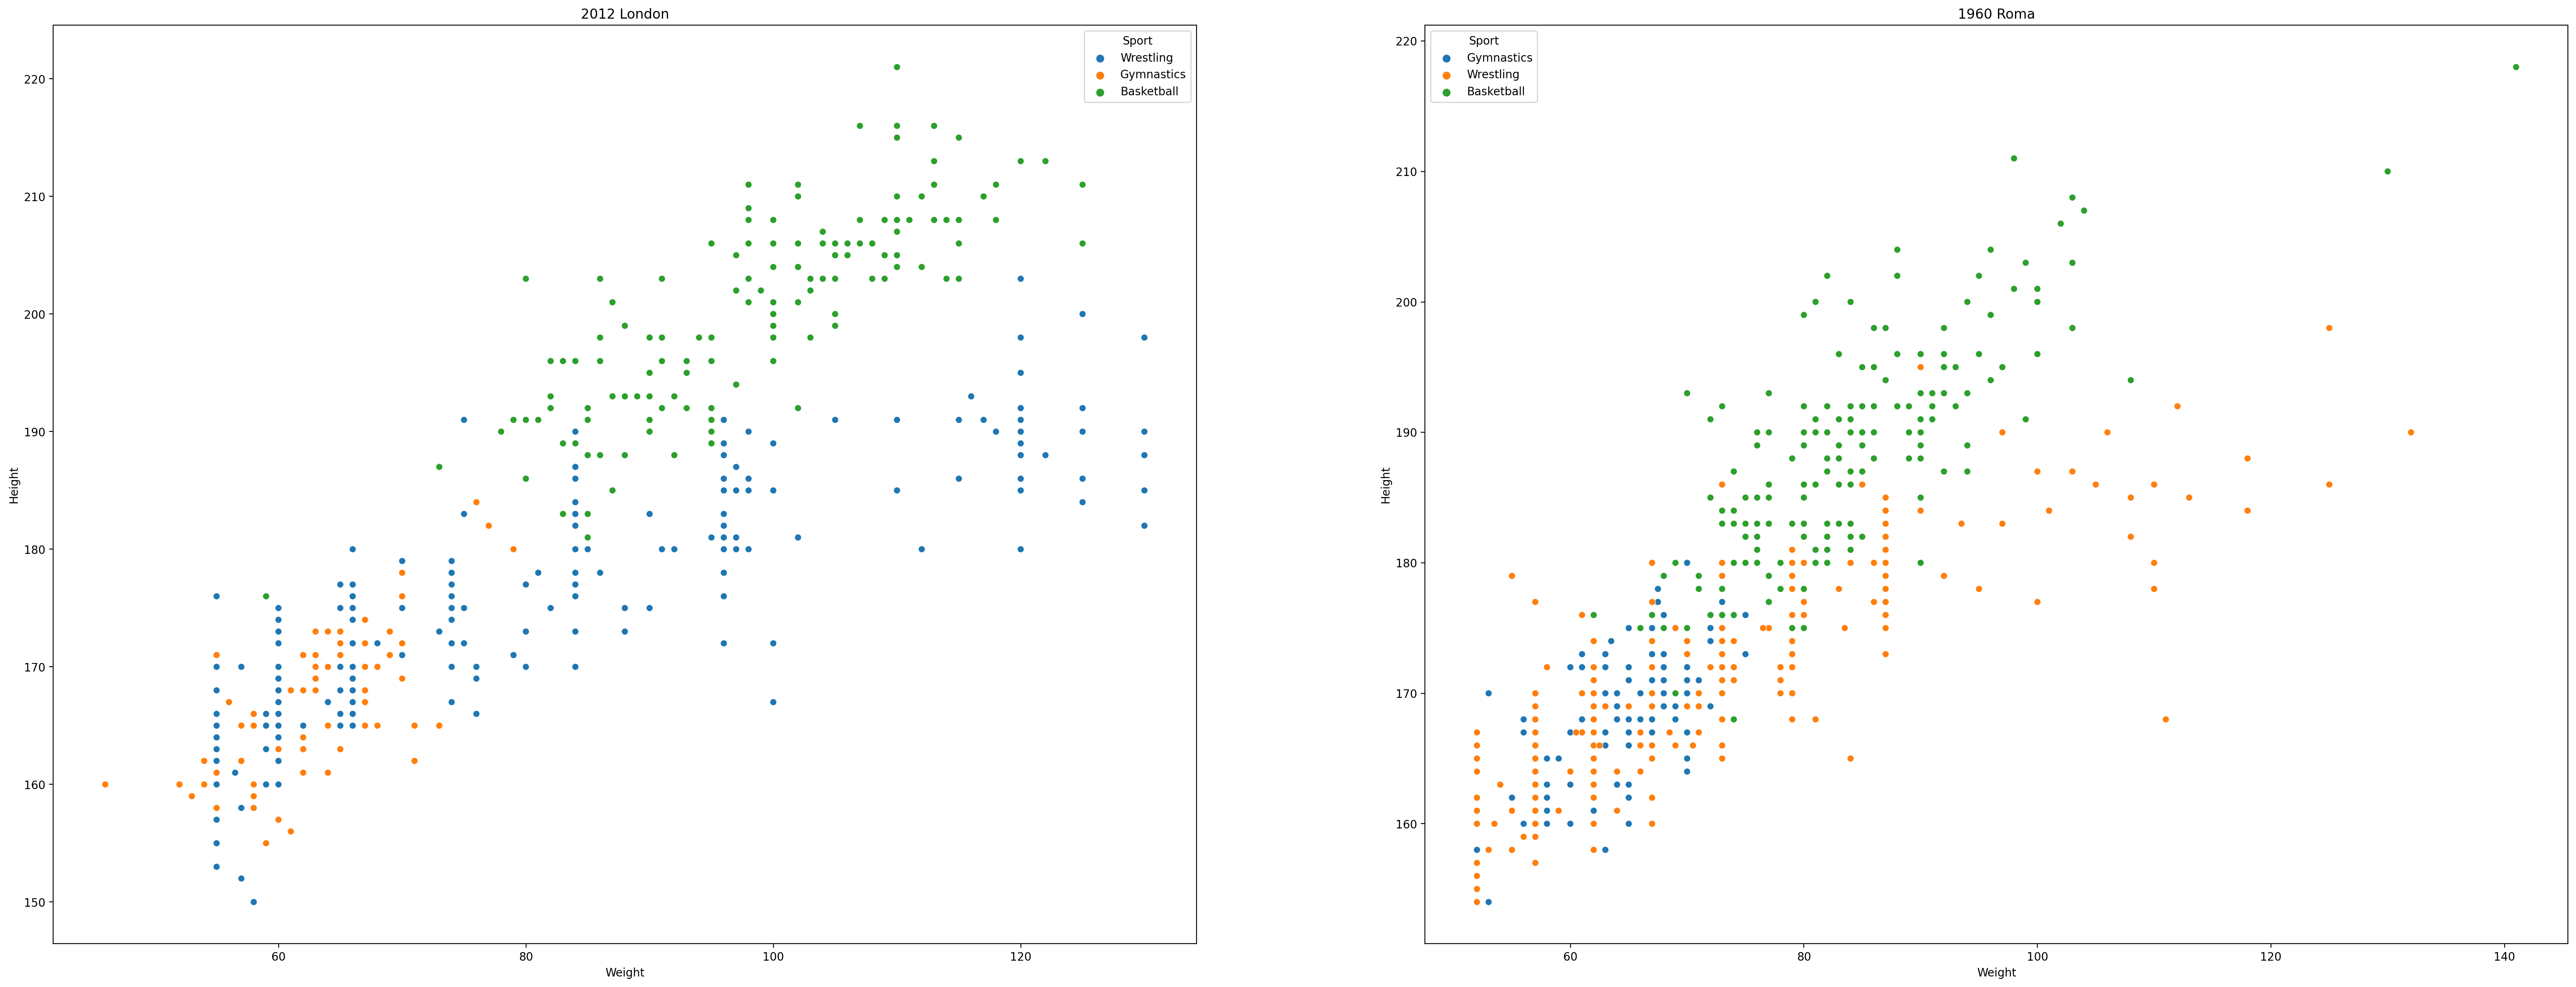

In [298]:
#df with atletes that play Basketball, Gymnastics, Wrestling, and are Male
olympics120summerdfc = olympics120summer.loc[(olympics120summer['Sport'].isin(["Basketball", "Gymnastics", "Wrestling"])) & (olympics120summer['Sex'] == 'M')]
#df for 2012 london
olympics120summerdfc2012London = olympics120summerdfc.loc[(olympics120summerdfc['City'] == 'London') & (olympics120summerdfc['Year'] == 2012)]

#df for 1960 Roma
olympics120summerdfc1960Roma = olympics120summerdfc.loc[(olympics120summerdfc['City'] == 'Roma') & (olympics120summerdfc['Year'] == 1960)]

#plotting side by side
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sb.scatterplot(data=olympics120summerdfc2012London, x="Weight", y="Height", hue="Sport")
plt.title("2012 London")

plt.subplot(1, 2, 2) # index 2
sb.scatterplot(data=olympics120summerdfc1960Roma, x="Weight", y="Height", hue="Sport")
plt.title("1960 Roma")

plt.show()

In [80]:
'''The relationship between height and weight between these atheletes is Linear and positive.
As height increases, weight increases almost proportionally. 
This is true for both cases - 1920 London and 1960 Roma. 
In general, athletes who's sport is basketball are more in the top right of the graph which shows they are taller and heiver than most of the other athletes in this subsection, 
and atheletes who's sport is gymnastics tend to be lighter and shorter. 
In 1920 Roma, we have a couple of outliers, whereas 2012 London we do not. 
In both 1920 Roma and 2012 London, the height and weight of wrestlers seems to be spread across the graph. 
There seem to be some really tall and really heavy basketball players in 1960 Roma whereas this is not the case for 2012 London.'''

"The relationship between height and weight between these atheletes is Linear and positive.\nAs height increases, weight increases almost proportionally. \nThis is true for both cases - 1920 London and 1960 Roma. \nIn general, athletes who's sport is basketball are more in the top right of the graph which shows they are taller and heiver than most of the other athletes in this subsection, \nand atheletes who's sport is gymnastics tend to be lighter and shorter. \nIn 1920 Roma, we have a couple of outliers, whereas 2012 London we do not. \nIn both 1920 Roma and 2012 London, the height and weight of wrestlers seems to be spread across the graph. \nThere seem to be some really tall and really heavy basketball players in 1960 Roma whereas this is not the case for 2012 London."

**d)** We are curious about which countries have the most gold medals per 1 million people. <br>
- Calculate how many gold medals the each country won per year at the Summer Olympics. **Hints:** You can filter the data with the query() function, keeping only the rows with gold medals. Then you can groupby() the country name and year attributes, and use .apply(lambda x: len(pd.unique(x))) on the Events column. <span style="color:red">What does this function do?</span> <br> <br> gold_medals=DataFramegolds.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x))) <br> <br> 
- Store this information in a new data frame containing the countries, year and number of gold metals. **Hints:** What is the type of the "gold_medals" variable you calculated in the last step? Try turning this object into lists using for example, list(gold_medals) and list(gold_medals.index). Now can you store the data from those lists in a new DataFrame? The new DataFrame should look something like this:
<table><tr><th></th><th>NOC</th><th>YEAR</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1992</td><td>1</td></tr><tr><td>2</td><td>ALG</td><td>1996</td><td>2</td></tr></table>
- Using this dataframe, sum the number of gold metals per country across all years. **Hints:** You can groupby country and then call the .sum() function on the gold medals column. Update your dataframe to contain only the country names and the gold medals, something like this:
<table><tr><th></th><th>NOC</th><th>GOLDMEDALS</th></tr><tr><td>1</td><td>ALG</td><td>1</td></tr><tr><td>2</td><td>ANZ</td><td>3</td></tr></table>
- Load the population data from https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx into a pandas DataFrame without downloading the file, then join the two tables.
- Add a new column to the data frame which shows the number of gold medals per capita by dividing the number of gold medals by the country's population. Multiply this result by 1,000,000 to instead show the number of gold metals per one million people.
- Which countries have the most gold medals per one million people? **Hint:** You can use the pandas sort_values() function.

In [ ]:
golddf = olympics120summer.loc[olympics120summer["Medal"] == "Gold"]

gold_medals=golddf.groupby(['NOC', 'Year']).Event.apply(lambda x: len(pd.unique(x)))

print("What does this function do?")
print("groupby function basically groups the rows by country name and year, and creates groups.")
print("then .Event.apply(lambda x: len(pd.unique(x)) counts how many distinct elements are in the events column and counts for each group that has been made, giving us in the end the number of gold medals that a country won in a particular year")
print("The data type of gold_medals is series")


In [146]:

#converting the number of gold medals to a list
medals = list(gold_medals)
#converting coutries and years to a list
country_year = list(gold_medals.index)
#converting countries and year list to a df
df1 = pd.DataFrame (country_year)
#converting gold medal numbers list to a df
df2 = pd.DataFrame (medals)
#concatenating the 2 dfs to make one df
df_goldmedals = pd.concat([df1,df2], axis=1)
#naming columns
df_goldmedals.columns = ['Country', 'Year', 'GoldMedals']

In [ ]:
#to group by country and year
medalsbyyearcountry = df_goldmedals.groupby(['Country', 'Year']).sum()
dfmedalsbyyearcountry = pd.DataFrame(medalsbyyearcountry)
print(dfmedalsbyyearcountry)

#to add up gold medals for each country
totalmedalsbycountry = df_goldmedals.groupby('Country').sum('GoldMedals')

#to convert to df
dftotalmedalsbycountry = pd.DataFrame(totalmedalsbycountry)
#dropping year column
dftotalmedalsbycountry.drop('Year', inplace = True, axis = 1)
print(dftotalmedalsbycountry)

In [ ]:
#loading population data
population = pd.read_excel("https://math.bme.hu/~pinterj/BevAdat1/Adatok/OlympicsPopulation.xlsx")
#renaming NOC column to country to match with medalsdf
population.rename(columns = {'NOC':'Country'}, inplace= True)

#merging the 2 tables
mergedpopmedals = population.merge(dftotalmedalsbycountry, how = "inner", on = 'Country')
#adding a new column for medals per million
mergedpopmedals['MedalsPerMillion'] = mergedpopmedals['GoldMedals'] / mergedpopmedals['POPULATION'] * 1000000
print(mergedpopmedals.sort_values('MedalsPerMillion', ascending=False))
print("FIN, HUN, BAH, SWE are amongst the countries having the highest gold medals per million")


---

## Exercise 2

Let's improve on the model used in class: decision tree on the bank dataset. (35%) 

**a)** In class we solved a classification problem on the *bank.csv* dataset using the kNN algorithm. The classifier performed poorly. Repeat the analysis carried out in class (based on the Notebook02), but now use a decision tree, set the maximum depth to be 6! **Hint:** Use the *tree.DecisionTreeClassifier* classifier!


In [175]:
bank_data = pd.read_csv("./Data/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,1,INNER_CITY,17546.00,0,1,0,0,0,0,1
1,40,0,TOWN,30085.10,1,3,1,0,1,1,0
2,51,1,INNER_CITY,16575.40,1,0,1,1,1,0,0
3,23,1,TOWN,20375.40,1,3,0,0,1,0,0
4,57,1,RURAL,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,INNER_CITY,47025.00,0,2,1,1,1,1,0
596,30,1,INNER_CITY,9672.25,1,0,1,1,1,0,0
597,31,1,TOWN,15976.30,1,0,1,1,0,0,1
598,29,0,INNER_CITY,14711.80,1,0,0,1,0,1,0


In [176]:
one_hot = pd.get_dummies(numeric_data['region'])
numeric_data = numeric_data.drop('region', axis = 1)
numeric_data = numeric_data.join(one_hot)
numeric_data

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,pep,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0,0,0,1
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0,0,0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0
597,31,1,15976.30,1,0,1,1,0,0,1,0,0,0,1
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0


In [177]:
# making the target label and the attribute/sample set to use in the decision tree model
bank_labels = numeric_data['pep']
bank_attrs  = numeric_data.drop('pep', axis=1)
bank_attrs

,age,sex,income,married,children,car,save_acct,current_acct,mortgage,INNER_CITY,RURAL,SUBURBAN,TOWN
0,48,1,17546.00,0,1,0,0,0,0,1,0,0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0,0,1
2,51,1,16575.40,1,0,1,1,1,0,1,0,0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0,0,1
4,57,1,50576.30,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,1,0,0,0
596,30,1,9672.25,1,0,1,1,1,0,1,0,0,0
597,31,1,15976.30,1,0,1,1,0,0,0,0,0,1
598,29,0,14711.80,1,0,0,1,0,1,1,0,0,0


In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree


In [230]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

In [231]:
#fitting and creating the model with max depth = 6
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(bank_features_train, bank_labels_train)



DecisionTreeClassifier(max_depth=6)

In [232]:
#prediction
prediction = clf.predict(bank_features_test)
prediction


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [233]:
#evaluation
cm = metrics.confusion_matrix(bank_labels_test,prediction)
print(cm)
print("Precision: ", metrics.precision_score(bank_labels_test,prediction))
print("Recall: ", metrics.recall_score(bank_labels_test,prediction))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test,prediction))


[[87 11]
 [16 84]]
Precision:  0.8842105263157894
Recall:  0.84
Accuracy:  0.8636363636363636


**b)** Now fit the tree using different parameters! Plot the ROC curve of the decision tree obtained in part a) and the new tree in the same figure (with different colors). Also plot the *y=x* diagonal line!

In [234]:
bank_features_train2, bank_features_test2, bank_labels_train2, bank_labels_test2 = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=44)

In [235]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf2.fit(bank_features_train2, bank_labels_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [236]:
prediction2 = clf2.predict(bank_features_test2)

In [237]:
#evaluation
cm2 = metrics.confusion_matrix(bank_labels_test2,prediction2)
print(cm2)
print("Precision: ", metrics.precision_score(bank_labels_test2,prediction2))
print("Recall: ", metrics.recall_score(bank_labels_test2,prediction2))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test2,prediction2))

[[94  9]
 [23 72]]
Precision:  0.8888888888888888
Recall:  0.7578947368421053
Accuracy:  0.8383838383838383


In [238]:
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, prediction, pos_label=1, sample_weight=None)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test2, prediction2, pos_label=1, sample_weight=None)

In [261]:
#for the y=x line in the plot:
import numpy as np
x = np.linspace(0,1,10)
y = x

(0.0, 1.0)

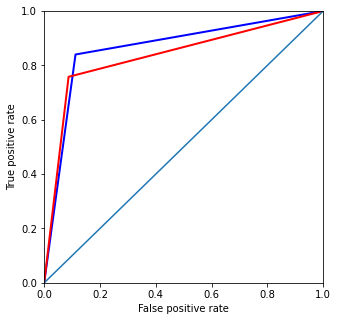

In [262]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0, c='blue')
plt.plot(fpr2,tpr2,linewidth=2.0, c='red')
plt.plot(x,y)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [241]:
metrics.roc_auc_score(bank_labels_test,prediction, sample_weight=None)

0.8638775510204081

In [242]:
metrics.roc_auc_score(bank_labels_test2,prediction2, sample_weight=None)

0.8352580480327032

**c)** Plot and interpret the decision tree. The easiest way to do this is with the sklearn.tree.plot_tree function. Here's a useful article: https://pythoninoffice.com/how-to-a-plot-decision-tree-in-python/.

* If you would like, you can try plotting the decision tree using the graphviz package too. **Hints:** Visualize the decision tree trained in part a) using the *tree.export_graphviz* function. To present the tree use the *graphviz.Source* function or the *SVG* function of the *Ipython.display* package! If *graphviz* is not installed you can install it using the Anaconda Navigator or by using *pip install* or by installing with homebrew, *brew install graphviz*. If it doesn't seem to work you can also download it from this [link](https://graphviz.gitlab.io/download/) and inserting the following lines of codes (use the correct path for your downloaded file):<br><br>
import os <br>
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin') <br><br>

* According to what attribute did we split the tree first? Which were the usual splitting attributes? <span style="color:red">Briefly interpret the results!</span>

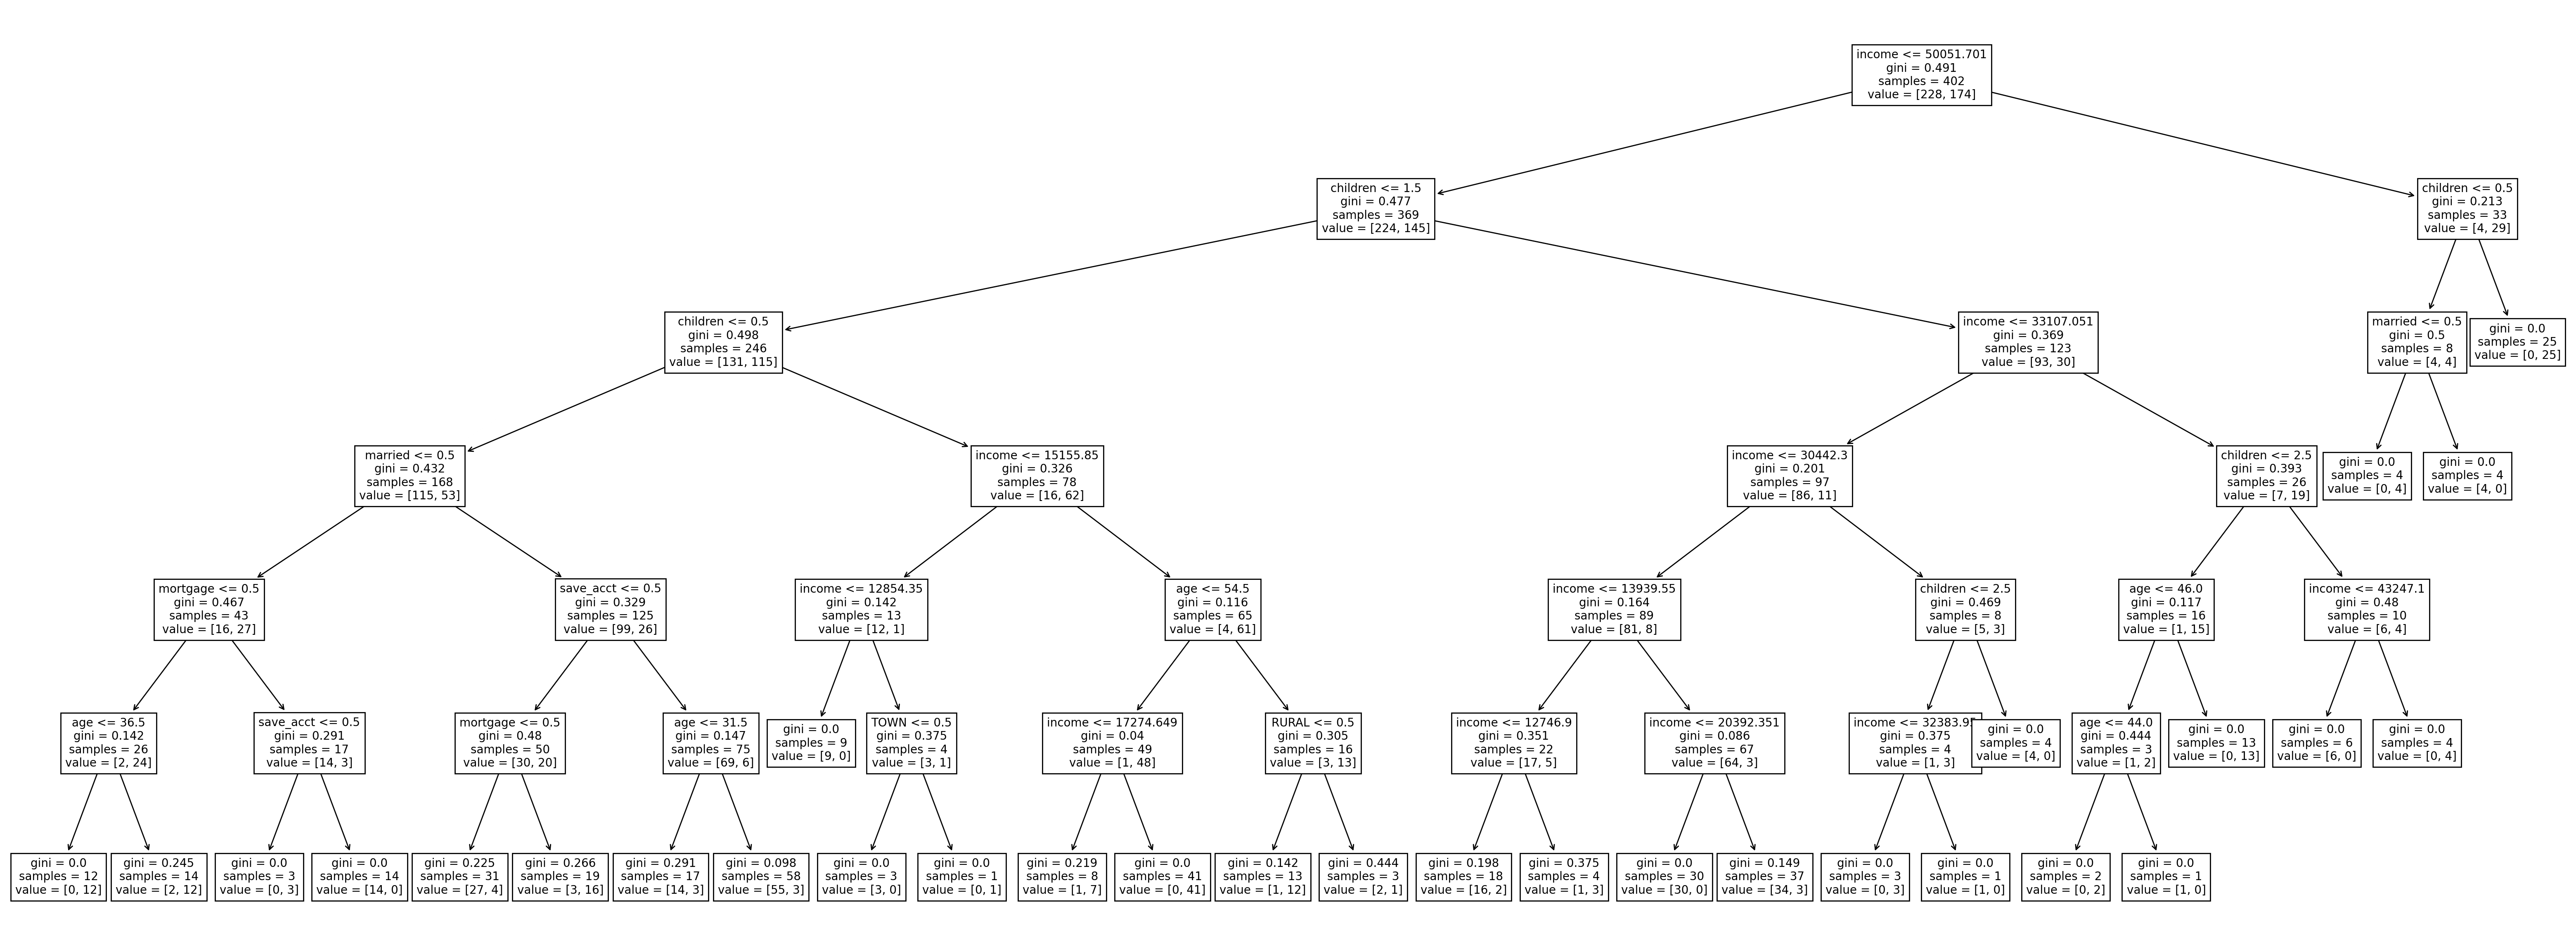

In [294]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.rcParams['figure.figsize'] = [40, 15]
plt.rcParams['figure.dpi'] = 200
tree.plot_tree(clf, feature_names=bank_attrs.columns, fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)


In [ ]:
print("The tree split first on the income attribute followed by the children attribute")
print("The usual attributes that the tree is splitting further on seems to be income and children")
print("Brief interpretation: Since a lot of the splits are on the income attribute, I would say that income is an important factor when predicting if someone will buy PEP after last mailing.")
print("We can also see from the tree that homogenity seems to increasing most when splitting based on income and children than any other attribute")
print("People with higher income, and children are likely to buy PEP")